# **SALARY PREDICTOR**

#Contributors
1429 Srsuhti Johari

1430 Gayatri Joshi

1432 Maithili Karle

1437 Daksha Kulkarni

### **OBJECTIVE**

**A relevant question is what determines the salary and the jobs these engineers **are offered right after graduation. 
**Various factors such as college grades, candidate skills, the proximity of the **college to industrial hubs, the specialization one have, 
**market conditions for specific industries determine this.**
**On the basis of these various factors,** 
**your objective is to determine the salary of an engineering graduate in India. **

**INSPIRATION**

**The data can be used not only to make an accurate salary predictor but also to understand what influences salary and job titles in the labour market**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')        # where a dark background can make the plot elements stand out more prominently.

In [ ]:
import io
from google.colab import files
uploaded= files.upload()

df = pd.read_csv(io.BytesIO(uploaded['salarypredict.csv']))
df.head()                                                                        # First 5 columns

Saving salarypredict.csv to salarypredict.csv


,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.shape     #2998 = Row     34 = columns 

(2998, 34)

In [ ]:
df.columns                             # Total num of cols

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

**DATA CLEANING**

In [ ]:
df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState'                       # drop cols that are not neccessary
                                     ,'CollegeCityID', 'CollegeCityTier'
                                         ,'GraduationYear'], axis = 1, inplace = True)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df = df.drop_duplicates()              # drop duplicates rows

In [ ]:
df.info()                              # To check for null values in each cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [ ]:
df.describe()      # mathematical description of dataset       #AMCAT = for placement


,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.Degree.unique()              # Unique values in "Degree" col

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [ ]:
df.Specialization.unique()           # Too many unique value (Not good) 

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [ ]:
df.Specialization.value_counts()            # Count of each type of Specialization

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
specialization = df.Specialization.value_counts(ascending = False)
specialization

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
specializationlessthan10 = specialization[specialization<=10]    # specialization count <10 in one col
specializationlessthan10

other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & production engineerin

In [ ]:
def removespeciallessthan10(value):                        # Put all these specialization (<10)in other Section 
    if value in specializationlessthan10: 
        return 'other'
    else:
        return value
df.Specialization = df.Specialization.apply(removespeciallessthan10)
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


**DATA ANALYSIS AND VISUALIZATION**

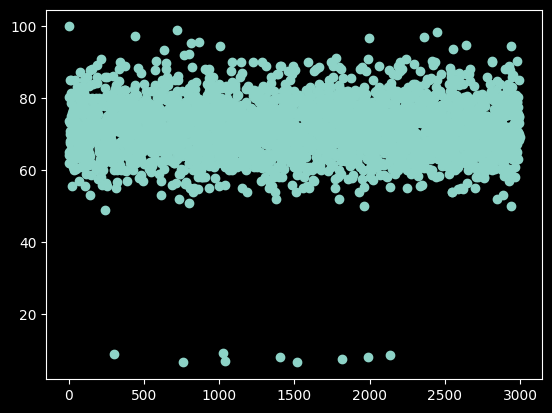

In [ ]:
plt.scatter(df.index, df['collegeGPA'])


In [ ]:
df = df[(df['collegeGPA']>40)]
df.shape

(2989, 24)

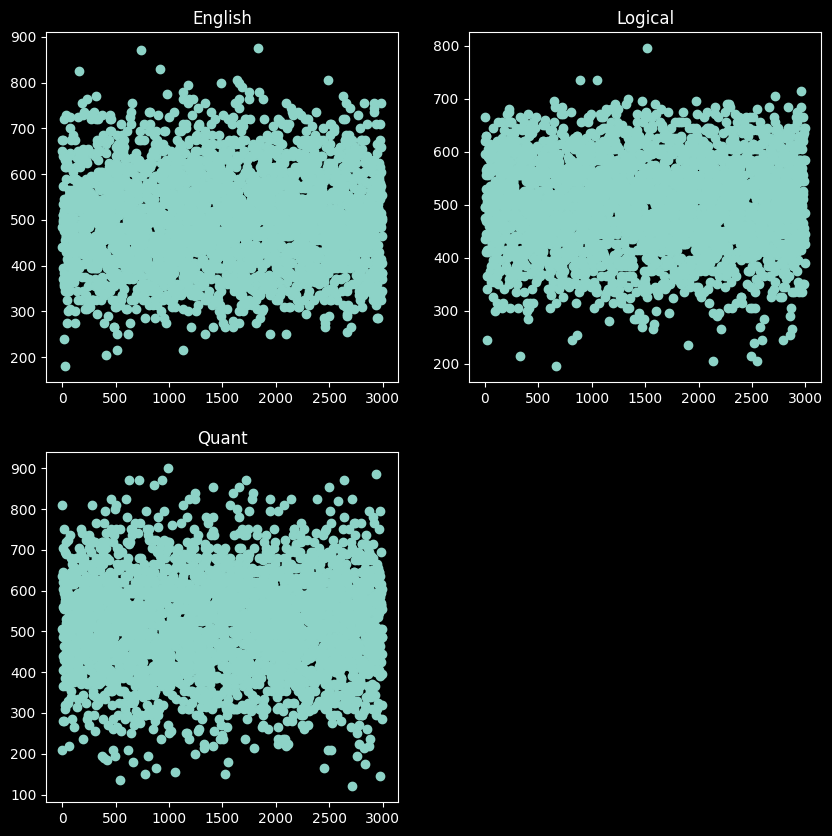

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index, df.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index, df.Quant)
plt.title('Quant')

plt.show()

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

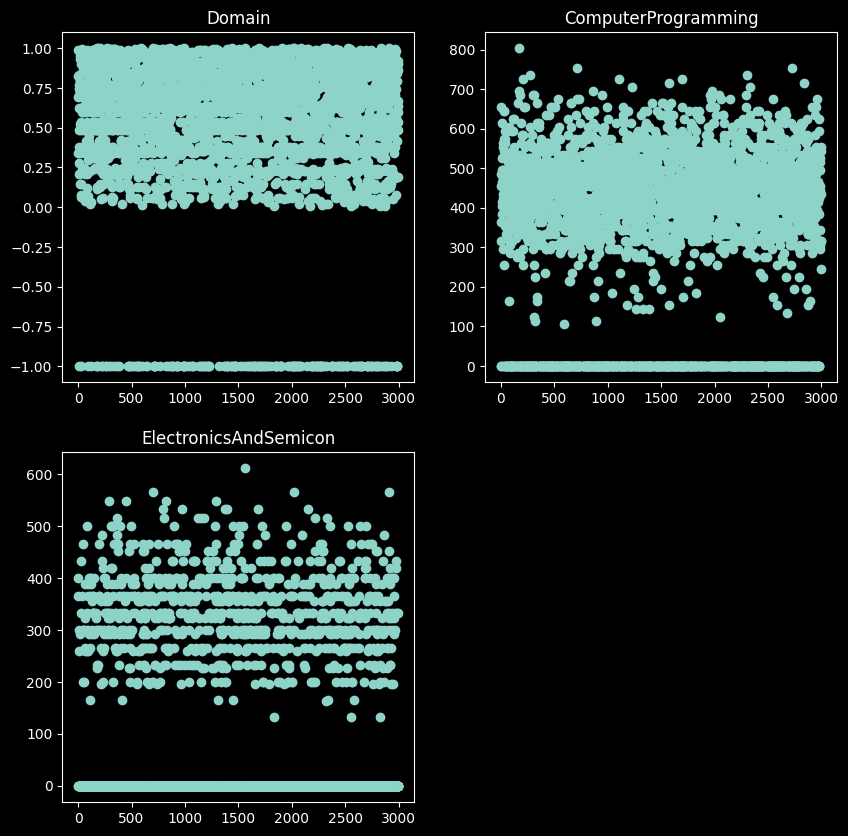

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.Domain)
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

In [ ]:
df = df.replace(-1, np.nan)                 # replace -1 by NAN

In [ ]:
cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]               # replace all NAN values by mean of that col
for column in cols_with_nan:
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='Gender', ylabel='count'>

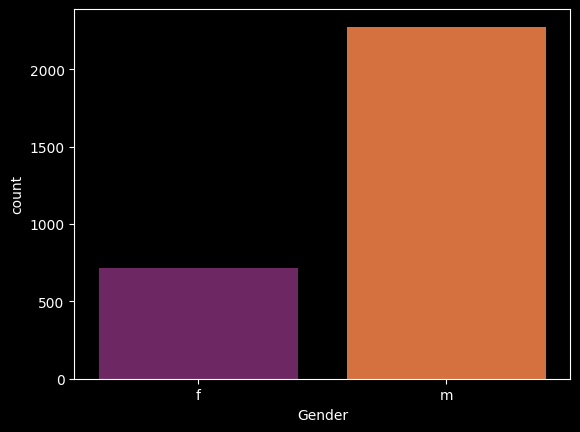

In [ ]:
sns.countplot(x=df.Gender, palette = 'inferno')

<Axes: xlabel='10percentage', ylabel='12percentage'>

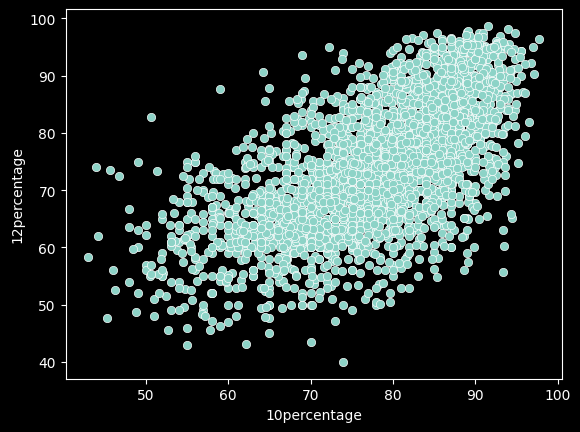

In [ ]:
sns.scatterplot(x=df['10percentage'], y=df['12percentage'])

<Axes: xlabel='10percentage', ylabel='12percentage'>

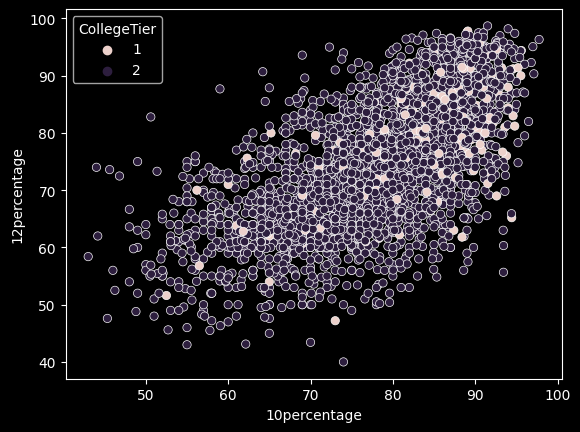

In [ ]:

sns.scatterplot(x=df['10percentage'], y=df['12percentage'], hue = df.CollegeTier)

In [ ]:
df.drop(['10percentage'], axis = 1, inplace = True)     # drop 10th percentage col as it is observed that if10th percentage linearly increases with 12th percentage.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'other'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

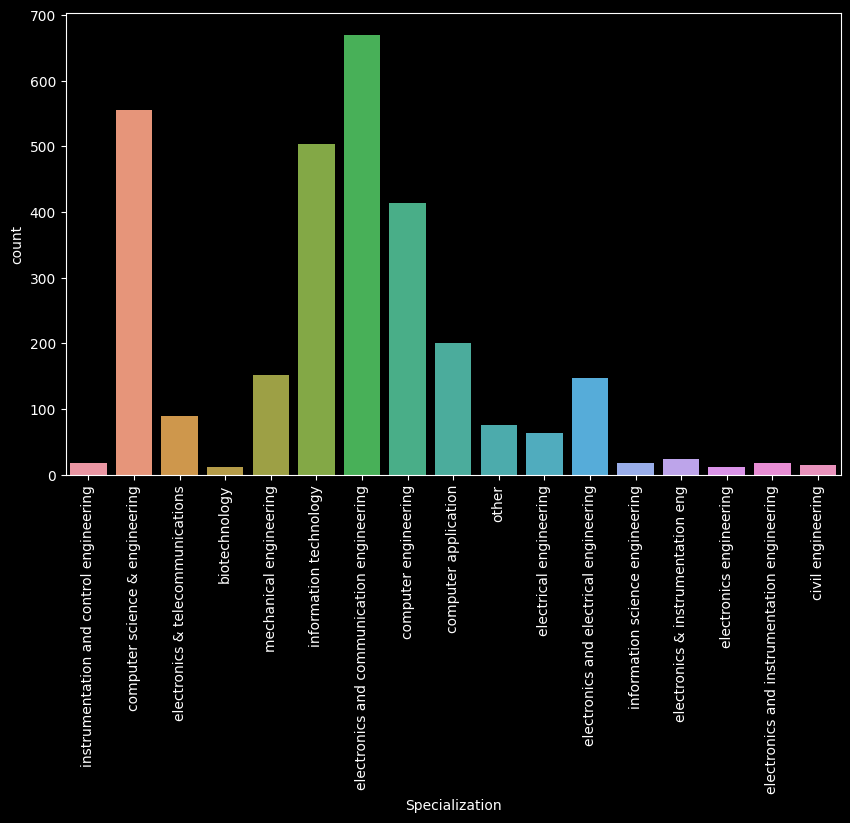

In [ ]:

plt.figure(figsize = (10,6))
sns.countplot(x=df['Specialization'])
plt.xticks(rotation = 90)


In [ ]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='collegeGPA', ylabel='Salary'>

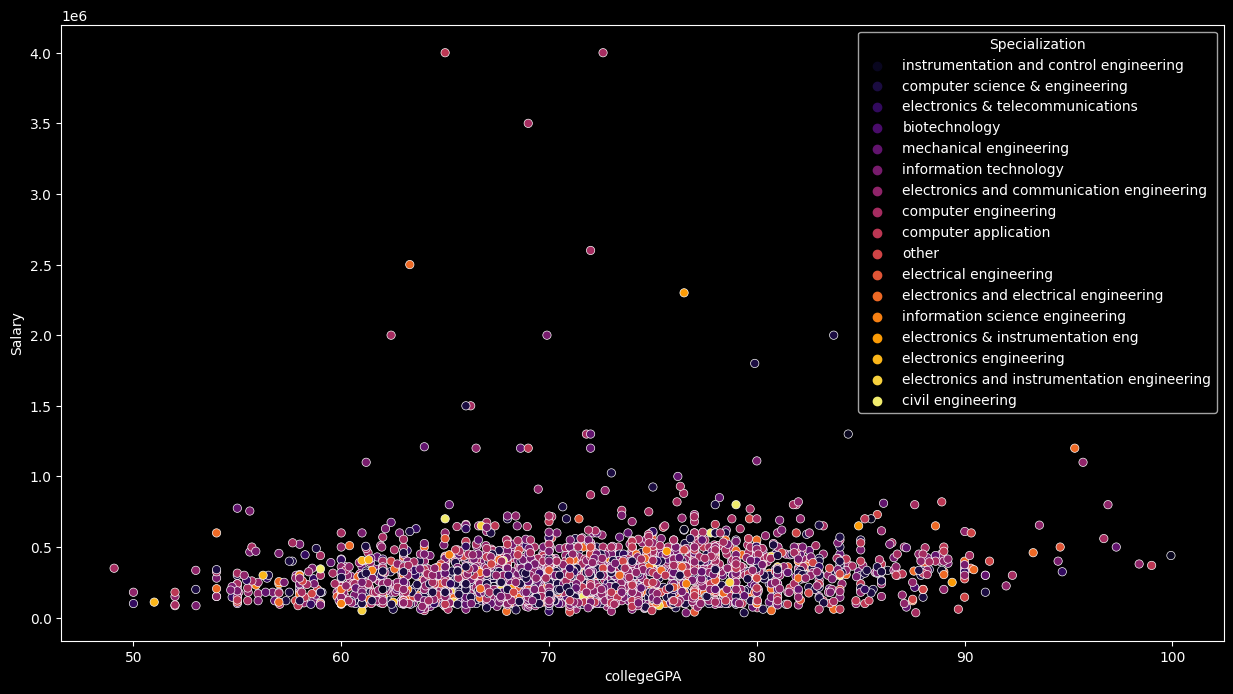

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df.collegeGPA, y=df.Salary, hue = df.Specialization, palette = 'inferno')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

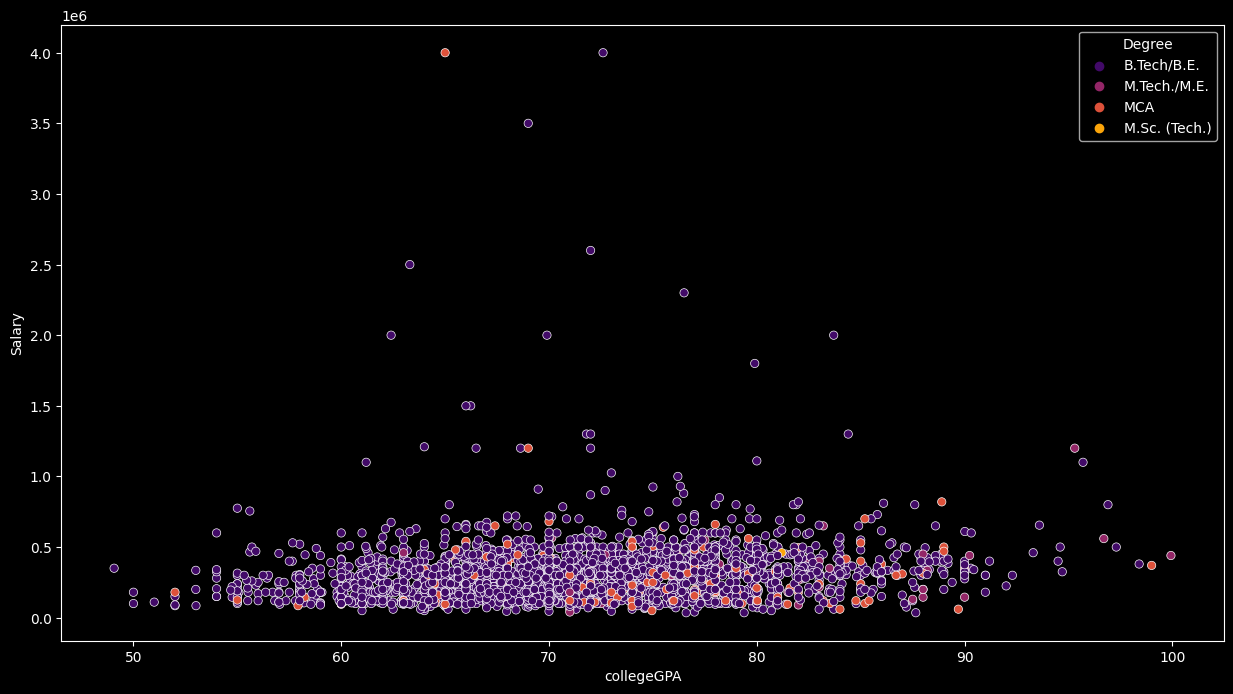

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df.collegeGPA,y= df.Salary, hue = df.Degree, palette = 'inferno')

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

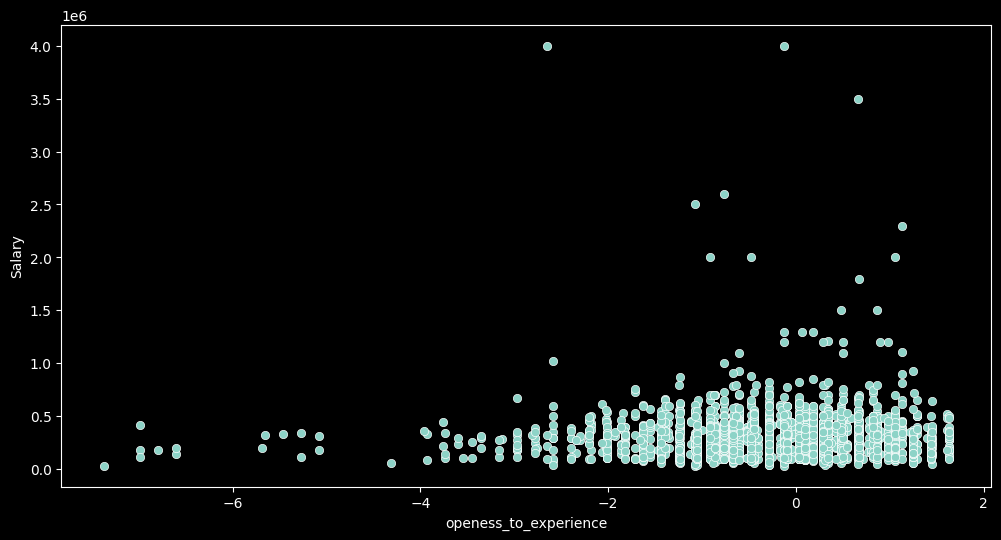

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df.openess_to_experience, y=df.Salary)


<Axes: xlabel='Domain', ylabel='Salary'>

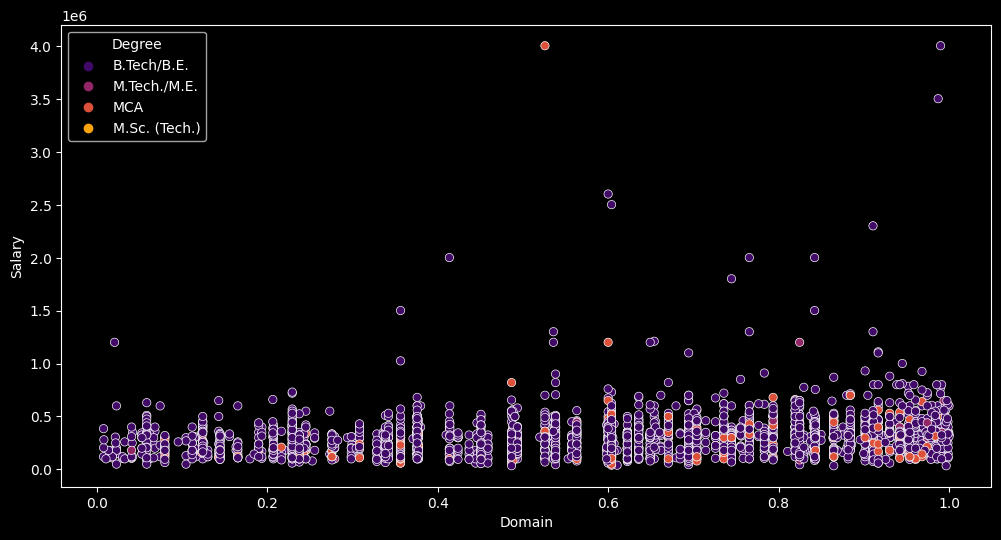

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df.Domain,y= df.Salary, hue = df.Degree, palette = 'inferno')

<ipython-input-37-149ea3360996>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

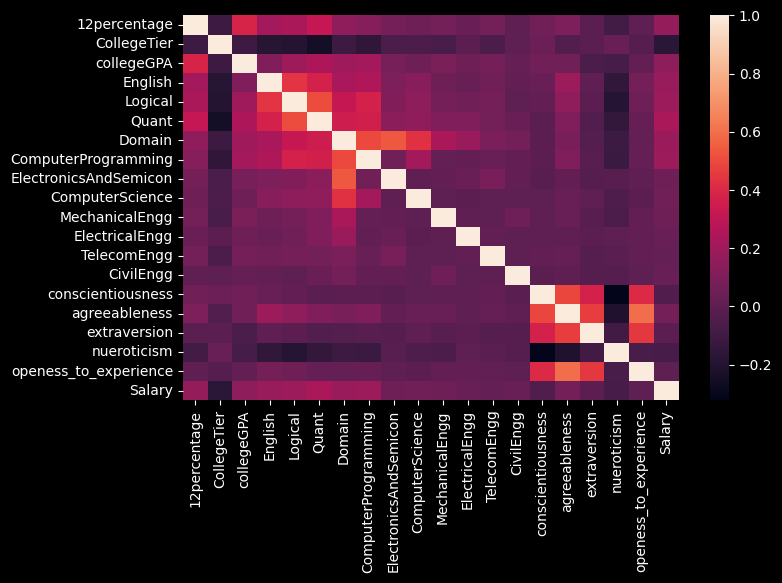

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr())

In [ ]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


**ALGORITHM IMPLEMENTATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [ ]:
x = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predictions = xgb.predict(X_test)
print(predictions)

[362944.12  386529.88  329391.    253628.16  301094.88  355059.62
 440427.9   443779.7   909424.4   250412.05  267526.2   213979.55
 330003.38  287147.6   235167.98  185256.27  321966.47  187165.78
 391580.9   383376.22  404044.7   249694.27  221510.58  205045.31
 358357.6   371899.9   239811.    185936.3   483375.34  196489.8
 240466.98  416856.72  541410.9   424841.03  239071.4   289351.72
 435871.34  137279.42  224022.42  283259.22  329453.47  380099.12
 332541.4   342902.66  292670.66  312734.22  455481.94  343328.
 514113.97  457577.16  382834.22  425659.34  331521.22  369623.9
 339210.44  120387.43  294937.3   228365.    284173.16  314016.78
 317756.1   253101.7   366128.6   401479.06  288255.5   276636.44
 281912.06  421941.44  341654.78  937651.1   231366.17  318235.75
  94978.08  376752.88   75830.13  300142.34  296234.34  298990.56
 375996.4   417608.66  310289.12  449533.25  258852.66  236879.
 300420.66  262348.78  248804.78  284234.25  271121.16  293554.88
 410849.25  3892

In [ ]:
diff = y_test - predictions

<ipython-input-45-b7386d8bf6c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Salary', ylabel='Density'>

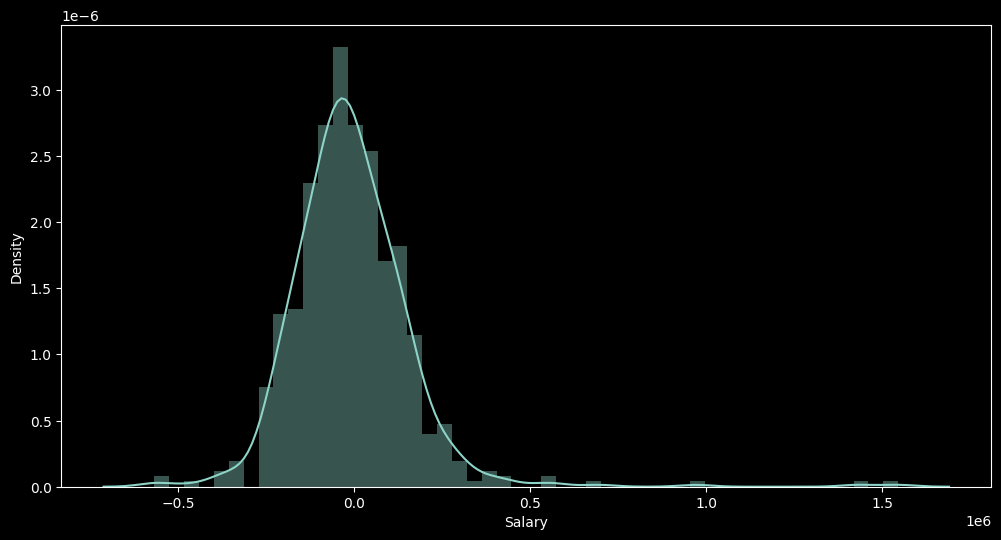

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

In [ ]:
xgb_r2_score = xgb.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  0.09876532055075804
